Homework 4: Feature Selection, bonus PCA.

**INSTRUCTIONS**

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution.

The homework consists of two parts:

    1. Data from our lives
    2. Variable selection

Follow the prompts in the attached jupyter notebook. 

**We are using the same data as for the previous homework**. This homework starts by rebuilding the **df2** dataframe (where data are already cleaned, variables dropped, and dummy variables created).

Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible. Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.


Submission: Send in an ipynb file of your work.

Good luck!


# 1. Data from our lives:

### Describe a situation or problem from your job, everyday life, current events, etc., for which a variable selection/feature reduction would be appropriate.

*Your Answer:*

# 2. Variable selection

In our class so far we have covered three types of feature selection techniques. They were: 

1. Filter methods
2. Wrapper methods
3. Embedded methods

Additionally, we have looked at a similar technique, Principle Component Analysis, that uses a mapping function to reduce the dimensionality of the data using mathematics (as opposed to selecting individual features).

### 2.0. Set up df2 dataframe

Import the dataset 'auto_imports1.csv' from our previous homework. Run the steps up to creating the **df2** dataframe (cleaning numbers, dropping variables with missing values, and creating dummy variables).

In [5]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import sklearn.metrics as met
%matplotlib inline

In [7]:
df =pd.read_csv('auto_imports1(1).csv')

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'auto_imports1(1).csv'

In [ ]:
df.info()

In [ ]:
df.isin(['?']).any()

In [ ]:
df = df.replace(to_replace='?',value = None)

In [4]:
df['bore']=df['bore'].astype(float)
df['stroke']=df['stroke'].astype(float)
df['horse_power']=df['horse_power'].astype(float)
df['peak_rpm']=df['peak_rpm'].astype(float)

NameError: name 'df' is not defined

In [68]:
df2 = df.drop(['body','engine_type','cylinders'],axis=1)

In [69]:
df2 = df2.dropna(axis = 0)

In [70]:
df2 = pd.get_dummies(df2,prefix = 'dummy',columns=['fuel_type'],drop_first=True)

<AxesSubplot:>

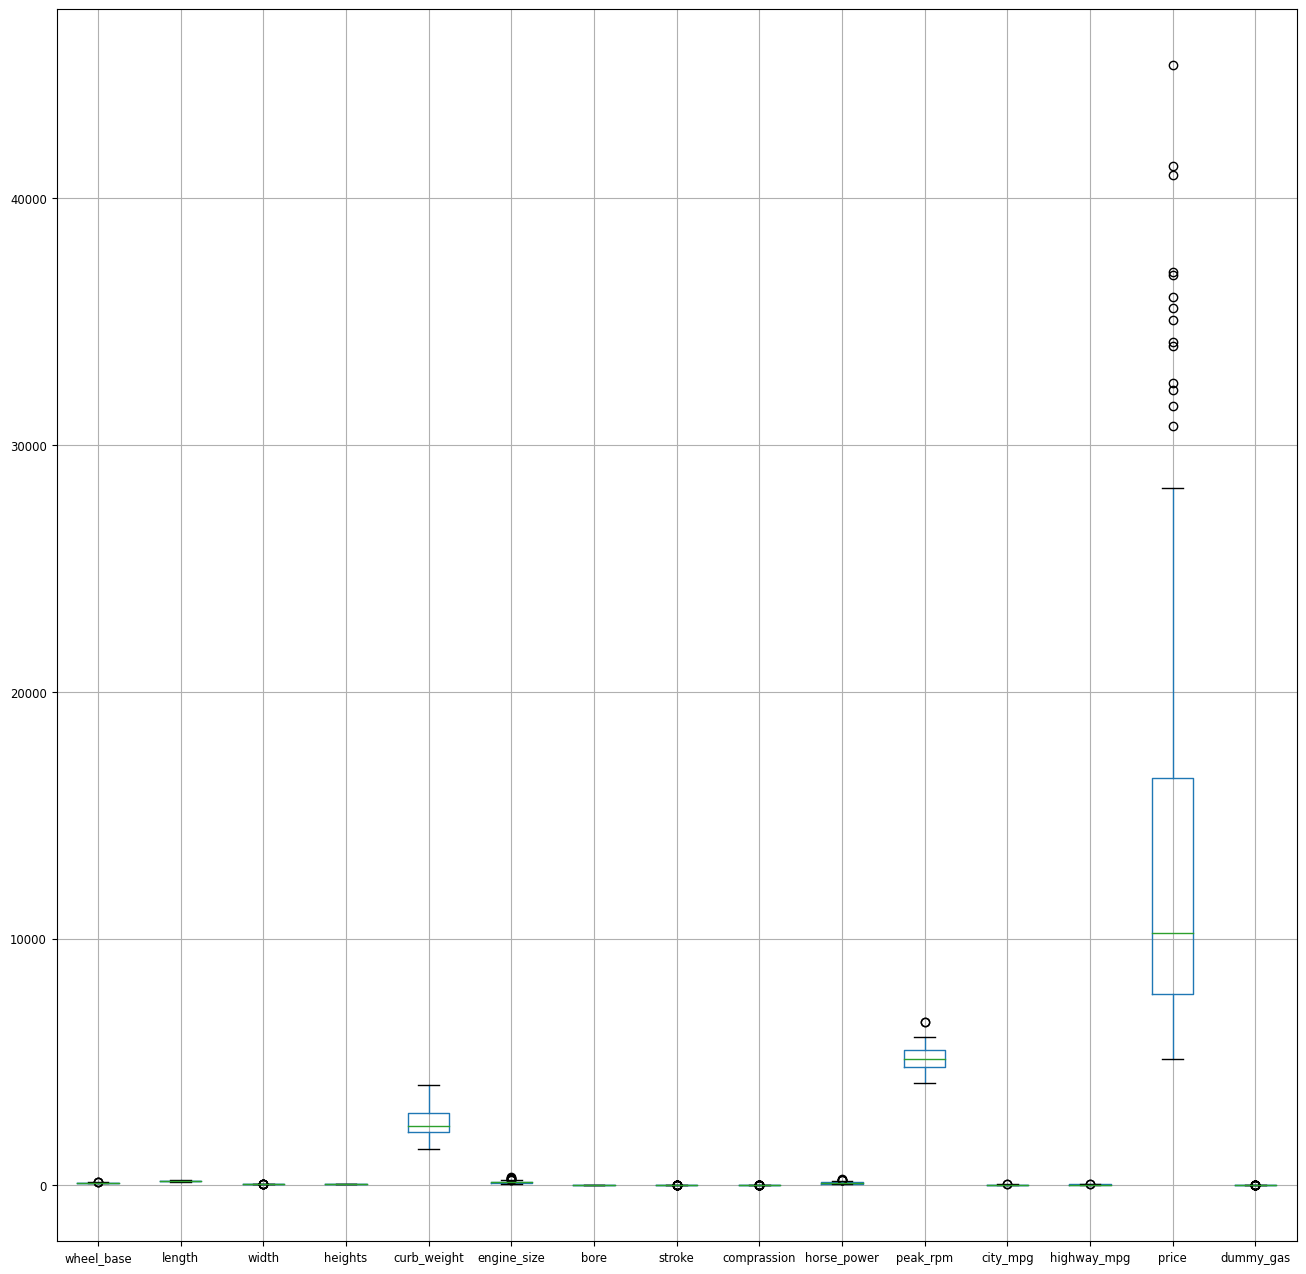

In [71]:
df2.boxplot(fontsize='small',figsize=(16,16))

In [72]:
cols = ['wheel_base','length','width','heights','curb_weight','engine_size','bore','stroke','comprassion','horse_power','peak_rpm','price','city_mpg','highway_mpg','dummy_gas']
for x in cols:
    q75,q25 = np.percentile(df2.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df2.loc[df2[x] < min,x] = np.nan
    df2.loc[df2[x] > max,x] = np.nan

<AxesSubplot:>

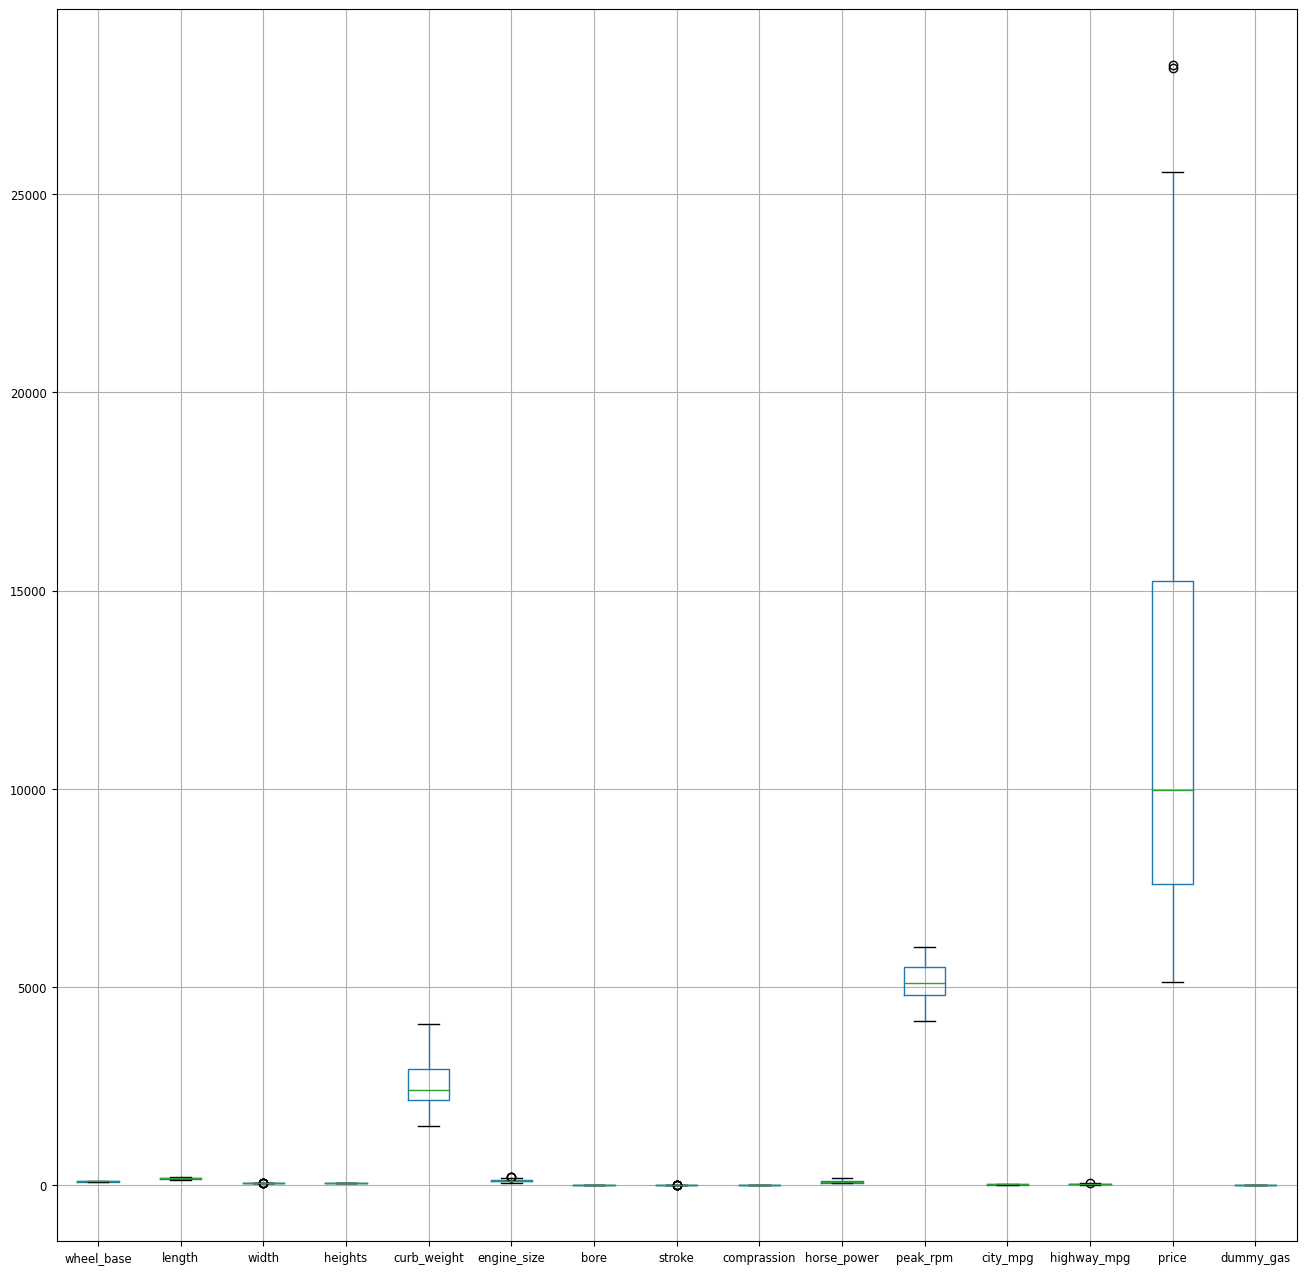

In [73]:
df2.boxplot(fontsize='small',figsize=(16,16))

In [74]:
df2.isna().sum()

wheel_base      3
length          0
width           7
heights         0
curb_weight     0
engine_size     7
bore            0
stroke         18
comprassion    27
horse_power     5
peak_rpm        2
city_mpg        2
highway_mpg     2
price          14
dummy_gas      20
dtype: int64

In [75]:
df2 = df2.dropna(axis = 0)

<AxesSubplot:>

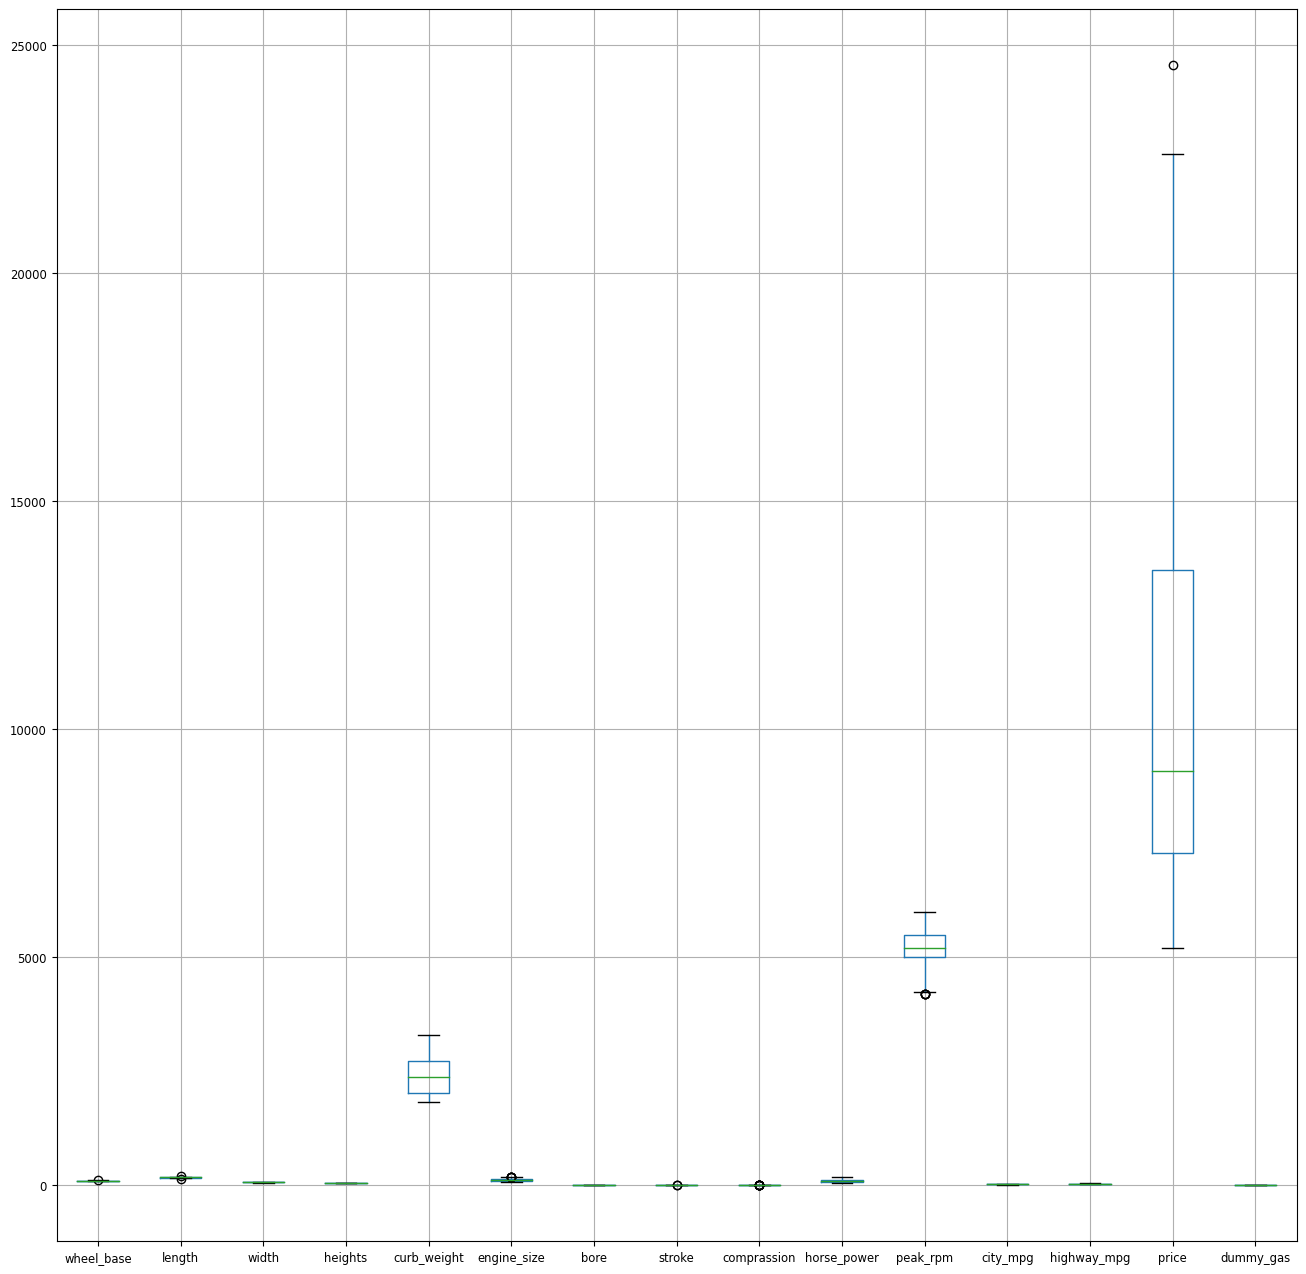

In [76]:
df2.boxplot(fontsize='small',figsize=(16,16))

In [77]:
df2.isna().sum()

wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
comprassion    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dummy_gas      0
dtype: int64

In [1]:
a= df2.drop(['price'],axis =1)
b= df2['price']

NameError: name 'df2' is not defined

In [79]:
a0_train,a0_test,b0_train,b0_test = train_test_split(a,b,random_state=25)

In [80]:
model1 = LinearRegression()
model1.fit(a0_train,b0_train)

LinearRegression()

In [81]:
y0_predict = model1.predict(X0_test)

In [82]:
print("Mean absolute error =", round(met.mean_absolute_error(y0_test,y0_predict), 2)) 
print("Mean squared error =", round(met.mean_squared_error(y0_test, y0_predict), 2)) 
print("Median absolute error =", round(met.median_absolute_error(y0_test, y0_predict), 2)) 
print("variance score =", round(met.explained_variance_score(y0_test,y0_predict), 2)) 
print("R2 score =", round(met.r2_score(y0_test, y0_predict), 2))
print("Adjusted R2 score =",1 - (1-model1.score(X,y))*(len(y)-1)/(len(y)-X.shape[1]-1))
print('Intercept:', model1.intercept_)

Mean absolute error = 1555.42
Mean squared error = 4009966.49
Median absolute error = 1214.43
variance score = 0.68
R2 score = 0.68
Adjusted R2 score = 0.7914136219324888
Intercept: -8056.680937648285


In [83]:
MAE_0 =round(met.mean_absolute_error(y0_test,y0_predict), 2)
MSE_0 = round(met.mean_squared_error(y0_test, y0_predict), 2)
MeAE_0 = round(met.median_absolute_error(y0_test, y0_predict), 2)
VS_0 =round(met.explained_variance_score(y0_test,y0_predict), 2)
R2_0 = round(met.r2_score(y0_test, y0_predict), 2)
AR2_0 = 1 - (1-model1.score(X,y))*(len(y)-1)/(len(y)-X.shape[1]-1)
Inter_0 = model1.intercept_

### 2.1. Filtered methods

Choose one (you may do more, one is required) of the filtered methods to conduct variable selection. Report your findings.

### Correlation method

In [84]:
q = df2.corrwith(df2["price"])
q

wheel_base     0.631330
length         0.727881
width          0.732616
heights        0.217836
curb_weight    0.833727
engine_size    0.780830
bore           0.679766
stroke        -0.189659
comprassion   -0.126152
horse_power    0.809788
peak_rpm      -0.101641
city_mpg      -0.815778
highway_mpg   -0.804041
price          1.000000
dummy_gas           NaN
dtype: float64

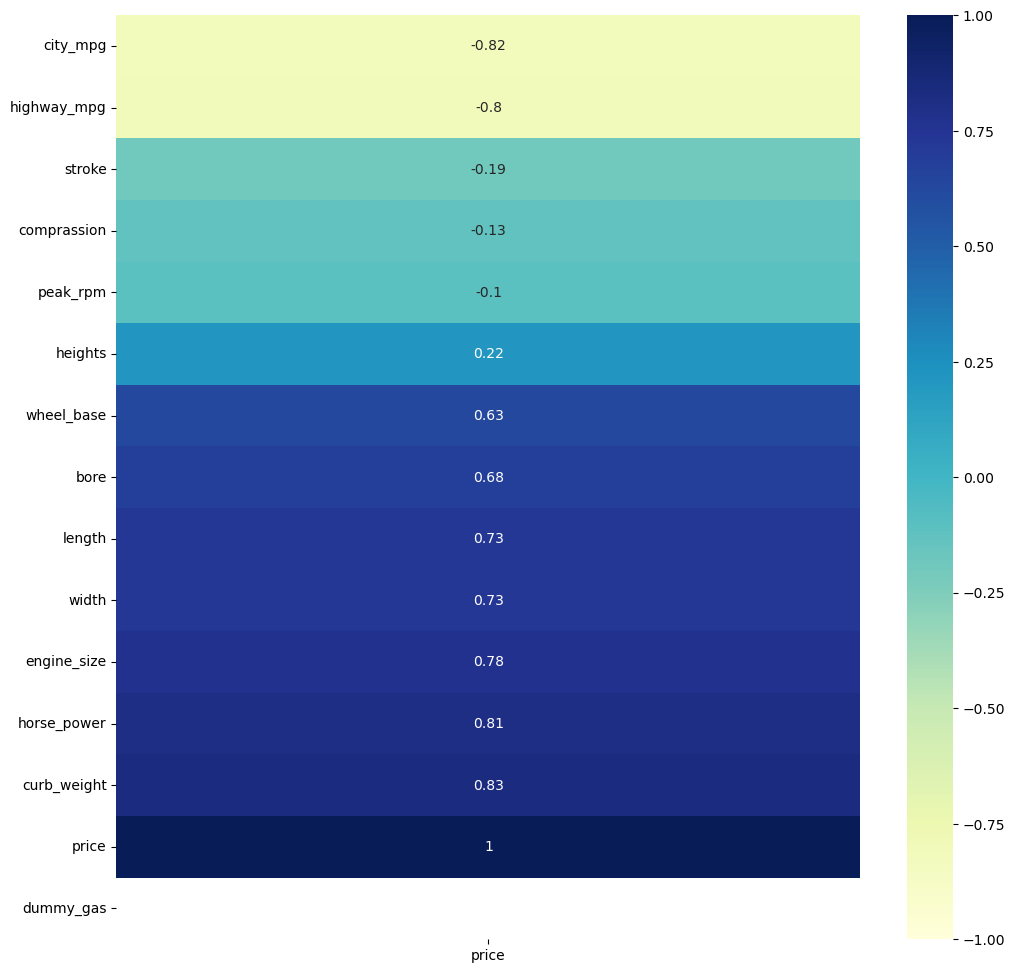

In [85]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df2.corr()[['price']].sort_values('price').tail(20),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);

In [86]:
df3 = df2.drop(["heights","highway_mpg","city_mpg","peak_rpm","comprassion","stroke",],axis=1)


In [87]:
x2 = df3.drop(['price'],axis =1)
y2 = df3['price']

In [88]:
ols = sm.OLS(y2, x2)
model1_ols = ols.fit()
print(model1_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     54.59
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           4.83e-35
Time:                        01:11:18   Log-Likelihood:                -1215.9
No. Observations:                 133   AIC:                             2448.
Df Residuals:                     125   BIC:                             2471.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
wheel_base     81.9059     89.892      0.911      

In [89]:
X_train,X_test,y_train,y_test = train_test_split(x2,y2)

In [90]:
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [91]:
y_predict2 =  model2.predict(X_test)

In [92]:
import sklearn.metrics as met
print("Mean absolute error =", round(met.mean_absolute_error(y_test,y_predict2), 2)) 
print("Mean squared error =", round(met.mean_squared_error(y_test, y_predict2), 2)) 
print("Median absolute error =", round(met.median_absolute_error(y_test, y_predict2), 2)) 
print("variance score =", round(met.explained_variance_score(y_test,y_predict2), 2)) 
print("R2 score =", round(met.r2_score(y_test, y_predict2), 2))
print("Adjusted R2 score =",1 - (1-model2.score(x2, y2))*(len(y2)-1)/(len(y2)-x2.shape[1]-1))
print('Intercept:', model2.intercept_)

Mean absolute error = 1692.62
Mean squared error = 5354904.73
Median absolute error = 1323.95
variance score = 0.71
R2 score = 0.71
Adjusted R2 score = 0.7318577729968924
Intercept: -24006.634748276127


In [95]:
MAE_1 = round(met.mean_absolute_error(y_test,y_predict2), 2)
MSE_1 = round(met.mean_squared_error(y_test, y_predict2), 2)
MeAE_1 = round(met.median_absolute_error(y_test, y_predict2), 2)
VS_1 = round(met.explained_variance_score(y_test,y_predict2), 2)
R2_1 = round(met.r2_score(y_test, y_predict2), 2)
AR2_1 =1 - (1-model2.score(x2, y2))*(len(y2)-1)/(len(y2)-x2.shape[1]-1)
Inter_1 = model2.intercept_

In [152]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)

#Fit and transforming on train data
data_constant = constant_filter.fit_transform(X_train)
print(data_constant.shape)

#Extracting all constant columns using get support function of our filter
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]

#No. of constant columns
print(len(constant_columns))

#Constant columns names:
for column in constant_columns:
    print(column)

(79, 13)
1
dummy_gas


### 2.2. Wrapper methods

Choose one (you may do more, one is required) of the wrapper methods to conduct variable selection. Report your findings.

### Forward selection 

In [96]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [97]:
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=7, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [98]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished

[2022-11-10 01:11:44] Features: 1/7 -- score: -7342388.215165639[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished

[2022-11-10 01:11:44] Features: 2/7 -- score: -6437058.016983976[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2022-11-10 01:11:44] Features: 3/7 -- score: -5963881.550470811[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [99]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['wheel_base', 'heights', 'curb_weight', 'stroke', 'comprassion', 'horse_power', 'city_mpg']


In [100]:
ff_data = df2[feat_names]
ff_data['price'] = df2['price']

C:\Users\arjul\AppData\Local\Temp\ipykernel_12520\655913355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff_data['price'] = df2['price']


In [101]:
ff_data.shape, df2.shape

((133, 8), (133, 15))

In [102]:
ff_data.head()

,wheel_base,heights,curb_weight,stroke,comprassion,horse_power,city_mpg,price
0,88.6,48.8,2548.0,2.68,9.0,111.0,21.0,13495.0
1,88.6,48.8,2548.0,2.68,9.0,111.0,21.0,16500.0
2,94.5,52.4,2823.0,3.47,9.0,154.0,19.0,16500.0
3,99.8,54.3,2337.0,3.40,10.0,102.0,24.0,13950.0
4,99.4,54.3,2824.0,3.40,8.0,115.0,18.0,17450.0


In [103]:
x3 = ff_data.drop(['price'],axis =1)
y3 = ff_data['price']

In [104]:
ols2 = sm.OLS(y2, x2)
model2_ols = ols2.fit()
print(model2_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     54.59
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           4.83e-35
Time:                        01:11:45   Log-Likelihood:                -1215.9
No. Observations:                 133   AIC:                             2448.
Df Residuals:                     125   BIC:                             2471.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
wheel_base     81.9059     89.892      0.911      

In [105]:
X3_train,X3_test,y3_train,y3_test = train_test_split(x3,y3,random_state=25)

In [106]:
model3 = LinearRegression()
model3.fit(X3_train,y3_train)

LinearRegression()

In [107]:
y_predict3 =  model3.predict(X3_test)

In [108]:
print("Mean absolute error =", round(met.mean_absolute_error(y3_test,y_predict3), 2)) 
print("Mean squared error =", round(met.mean_squared_error(y3_test, y_predict3), 2)) 
print("Median absolute error =", round(met.median_absolute_error(y3_test, y_predict3), 2)) 
print("variance score =", round(met.explained_variance_score(y3_test,y_predict3), 2)) 
print("R2 score =", round(met.r2_score(y3_test, y_predict3), 2))
print("Adjusted R2 score =",1 - (1-model3.score(x3, y3))*(len(y3)-1)/(len(y3)-x3.shape[1]-1))
print('Intercept:', model3.intercept_)

Mean absolute error = 1424.26
Mean squared error = 3532266.46
Median absolute error = 1037.67
variance score = 0.72
R2 score = 0.72
Adjusted R2 score = 0.8028503378389616
Intercept: 6309.18725255633


In [109]:
MAE_2 = round(met.mean_absolute_error(y3_test,y_predict3), 2) 
MSE_2 = round(met.mean_squared_error(y3_test, y_predict3), 2) 
MeAE_2 = round(met.median_absolute_error(y3_test, y_predict3), 2) 
VS_2 = round(met.explained_variance_score(y3_test,y_predict3), 2) 
R2_2 = round(met.r2_score(y3_test, y_predict3), 2)
AR2_2 = 1 - (1-model3.score(x3, y3))*(len(y3)-1)/(len(y3)-x3.shape[1]-1)
Inter_2 = model3.intercept_

### Backward elimination

In [110]:
sfs2 = sfs(lreg, k_features=7, forward=False, verbose=2, scoring='neg_mean_squared_error')

In [111]:
sfs2 = sfs2.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished

[2022-11-10 01:11:48] Features: 13/7 -- score: -6466738.966745781[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished

[2022-11-10 01:11:48] Features: 12/7 -- score: -5809518.206848724[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2022-11-10 01:11:48] Features: 11/7 -- score: -5455017.706685113[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [112]:
feat_names2 = list(sfs2.k_feature_names_)
print(feat_names)

['wheel_base', 'heights', 'curb_weight', 'stroke', 'comprassion', 'horse_power', 'city_mpg']


In [113]:
bb_data = df2[feat_names2]
bb_data['price'] = df2['price']

C:\Users\arjul\AppData\Local\Temp\ipykernel_12520\69076340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_data['price'] = df2['price']


In [114]:
x4 = ff_data.drop(['price'],axis =1)
y4 = ff_data['price']

In [115]:
ols4 = sm.OLS(y4, x4)
model4_ols = ols4.fit()
print(model4_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              631.9
Date:                Thu, 10 Nov 2022   Prob (F-statistic):                    7.09e-95
Time:                        01:11:50   Log-Likelihood:                         -1197.2
No. Observations:                 133   AIC:                                      2408.
Df Residuals:                     126   BIC:                                      2429.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [116]:
X4_train,X4_test,y4_train,y4_test = train_test_split(x4,y4,random_state=25)

In [117]:
model4 = LinearRegression()
model4.fit(X4_train,y4_train)

LinearRegression()

In [118]:
y_predict4 =  model4.predict(X4_test)

In [119]:
print("Mean absolute error =", round(met.mean_absolute_error(y4_test,y_predict4), 2)) 
print("Mean squared error =", round(met.mean_squared_error(y4_test, y_predict4), 2)) 
print("Median absolute error =", round(met.median_absolute_error(y4_test, y_predict4), 2)) 
print("variance score =", round(met.explained_variance_score(y4_test,y_predict4), 2)) 
print("R2 score =", round(met.r2_score(y4_test, y_predict4), 2))
print("Adjusted R2 score =",1 - (1-model4.score(x4, y4))*(len(y4)-1)/(len(y4)-x4.shape[1]-1))
print('Intercept:', model4.intercept_)

Mean absolute error = 1424.26
Mean squared error = 3532266.46
Median absolute error = 1037.67
variance score = 0.72
R2 score = 0.72
Adjusted R2 score = 0.8028503378389616
Intercept: 6309.18725255633


### 2.3. Embedded methods

Choose one (you may do more, one is required) of the embedded methods to conduct variable selection. Report your findings.

In [120]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel


In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [122]:
X_train.shape, X_test.shape

((79, 14), (54, 14))

In [123]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(X_train, np.ravel(Y_train,order='C'))
sel_.get_support()
X_train = pd.DataFrame(X_train)

C:\Users\arjul\.conda\envs\data_science\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [124]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
np.sum(sel_.estimator_.coef_ == 0)))

total features: 14
selected features: 11
features with coefficients shrank to zero: 620


In [125]:
selected_feat

Index(['wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'comprassion', 'horse_power', 'peak_rpm', 'city_mpg',
       'highway_mpg'],
      dtype='object')

In [126]:
df4 = df2[selected_feat]
df4['price'] = df2['price']

C:\Users\arjul\AppData\Local\Temp\ipykernel_12520\1522224492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['price'] = df2['price']


In [127]:
df4.head()

,wheel_base,length,width,heights,curb_weight,engine_size,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,88.6,168.8,64.1,48.8,2548.0,130.0,9.0,111.0,5000.0,21.0,27.0,13495.0
1,88.6,168.8,64.1,48.8,2548.0,130.0,9.0,111.0,5000.0,21.0,27.0,16500.0
2,94.5,171.2,65.5,52.4,2823.0,152.0,9.0,154.0,5000.0,19.0,26.0,16500.0
3,99.8,176.6,66.2,54.3,2337.0,109.0,10.0,102.0,5500.0,24.0,30.0,13950.0
4,99.4,176.6,66.4,54.3,2824.0,136.0,8.0,115.0,5500.0,18.0,22.0,17450.0


In [128]:
x5 = df4.drop(['price'],axis =1)
y5 = df4['price']

In [129]:
ols4 = sm.OLS(y5, x5)
model4_ols = ols4.fit()
print(model4_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              332.1
Date:                Thu, 10 Nov 2022   Prob (F-statistic):                    2.57e-85
Time:                        01:11:54   Log-Likelihood:                         -1207.5
No. Observations:                 133   AIC:                                      2437.
Df Residuals:                     122   BIC:                                      2469.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [130]:
X5_train, X5_test, Y5_train, Y5_test = train_test_split(x5,y5, test_size=0.4, random_state=0)

In [131]:
model5 = LinearRegression()
model5.fit(X5_train,Y5_train)

LinearRegression()

In [132]:
y_predict5 = model5.predict(X5_test)

In [133]:
MAE_3 = print("Mean absolute error =", round(met.mean_absolute_error(Y5_test,y_predict5), 2)) 
MSE_3 = print("Mean squared error =", round(met.mean_squared_error(Y5_test, y_predict5), 2)) 
MeAE_3 = print("Median absolute error =", round(met.median_absolute_error(Y5_test, y_predict5), 2)) 
VS_3 = print("variance score =", round(met.explained_variance_score(Y5_test,y_predict5), 2)) 
R2_3 = print("R2 score =", round(met.r2_score(Y5_test, y_predict5), 2))
AR2_3 = print("Adjusted R2 score =",1 - (1-model5.score(x5,y5))*(len(y5)-1)/(len(y5)-x5.shape[1]-1))
Inter_3 = print('Intercept:', model1.intercept_)

Mean absolute error = 1781.34
Mean squared error = 6307584.96
Median absolute error = 1298.51
variance score = 0.69
R2 score = 0.67
Adjusted R2 score = 0.7471969078130218
Intercept: -8056.680937648285


In [134]:
MAE_3 = round(met.mean_absolute_error(Y5_test,y_predict5), 2)
MSE_3 = round(met.mean_squared_error(Y5_test, y_predict5), 2)
MeAE_3 = round(met.median_absolute_error(Y5_test, y_predict5), 2)
VS_3 = round(met.explained_variance_score(Y5_test,y_predict5), 2)
R2_3 = round(met.r2_score(Y5_test, y_predict5), 2)
AR2_3 = 1 - (1-model5.score(x5,y5))*(len(y5)-1)/(len(y5)-x5.shape[1]-1)
Inter_3 = model1.intercept_

### 2.4. Compare your results
Compare your results from the three methods and also compare the coefficients to the full linear regression model (model1) from the previous homework.

In [135]:
from pandas import DataFrame
MAE = [MAE_0,MAE_1,MAE_2,MAE_3]
MSE = [MSE_0,MSE_1,MSE_2,MSE_3]
MeAE = [MeAE_0,MeAE_1,MeAE_2,MeAE_3]
VS = [VS_0,VS_1,VS_2,VS_3]
R2 = [R2_0,R2_1,R2_2,R2_3]
AR2 = [AR2_0,AR2_1,AR2_2,AR2_3]
Inter = [Inter_0,Inter_1,Inter_2,Inter_3]

col={'Mean absolute error':MAE,'Mean squared error':MSE,'Median absolute error':MeAE,'variance score':VS,'R2 score':R2,'Adjusted R2 score':AR2,'Intercept':Inter}
models=['Model-1','Filter method-->Correlation method','Wrapper method-->Forward Elimination','Embedded method-->Lasso regression']
df=DataFrame(data=col,index=models)
df

,Mean absolute error,Mean squared error,Median absolute error,variance score,R2 score,Adjusted R2 score,Intercept
Model-1,1555.42,4009966.49,1214.43,0.68,0.68,0.791414,-8056.680938
Filter method-->Correlation method,1692.62,5354904.73,1323.95,0.71,0.71,0.731858,-24006.634748
Wrapper method-->Forward Elimination,1424.26,3532266.46,1037.67,0.72,0.72,0.802850,6309.187253
Embedded method-->Lasso regression,1781.34,6307584.96,1298.51,0.69,0.67,0.747197,-8056.680938


# 3. Bonus Question

### 3.1. Feature reduction with PCA (bonus question).

Reduce your features with PCA. Run a regression with the chosen number of PCA's, report your findings.

In [136]:
Xp_train,Xp_test,yP_train,yp_test = train_test_split(X,y,random_state=25)

In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [138]:
ss = StandardScaler()

In [139]:
Xp1_train = ss.fit_transform(Xp_train)


In [140]:
Xp1_test = ss.transform(Xp_test)

In [141]:
Xp1_test

array([[-0.74741966, -0.6550333 , -0.9890259 ,  0.31981664, -1.23525977,
        -0.79978038, -0.47913178,  0.18215255,  0.76469837, -0.9481689 ,
         0.01505319,  0.95774696,  0.93947139,  0.        ],
       [-0.43432567,  0.00714682, -0.13441873, -1.00835287,  0.66889673,
         0.04010471,  0.57328763, -0.14873006,  0.39799874, -0.2790436 ,
        -0.52686167, -0.31131354, -0.46177407,  0.        ],
       [-0.49694446, -0.5643237 , -0.62276569, -0.32284603, -0.85489518,
        -0.76160378, -0.32878615, -1.2516721 ,  0.03129911, -0.91630579,
        -1.06877654,  0.7764526 ,  0.93947139,  0.        ],
       [-0.18385048,  0.0797145 , -0.13441873,  0.405505  , -0.28784857,
         0.0782813 ,  0.19742355,  1.17480038, -0.88544996, -0.05600183,
         0.01505319,  0.23256953,  0.41400434,  0.        ],
       [ 1.00590668,  0.99588152,  1.3916655 , -0.7512878 ,  1.23360981,
         2.02528763, -0.02809489,  0.51303516,  0.58134855,  1.9832372 ,
         0.01505319, -1.03

In [142]:
pca_cmp = decomposition.PCA(n_components=5)

In [143]:
X_p = pca_cmp.fit_transform(Xp1_train)

In [144]:
X_t_p = pca_cmp.transform(Xp1_test)

In [145]:
X_p.shape

(99, 5)

In [146]:
Xp1_train.shape

(99, 14)

In [147]:
model_pca = LinearRegression()
model_pca.fit(X_p,yP_train)

LinearRegression()

In [148]:
pred = model_pca.predict(X_t_p)
pred

array([ 6793.02011968, 12710.82808602,  8770.40427971,  9446.60732578,
       17526.8428626 ,  9650.95802507, 10386.41922442, 14328.51395479,
        6822.66125794,  9285.74046216, 10306.86522825,  5643.46109603,
       10735.86125742,  7397.02007714,  5694.87711228,  5267.34137126,
       14942.80954935, 10735.86125742,  8335.68064784,  9373.73332234,
       10518.22001547, 13699.70318694,  9625.17115383, 17596.42208081,
       10521.13107349,  8262.03917077,  6056.69982723,  7250.47522527,
        9826.64274802, 16279.24697384, 14546.34584666,  6343.09583174,
        8833.5344144 , 13118.95614962])

In [149]:
MAE_p = print("Mean absolute error =", round(met.mean_absolute_error(yp_test,pred), 2)) 
MSE_p = print("Mean squared error =", round(met.mean_squared_error(yp_test, pred), 2)) 
MeAE_p = print("Median absolute error =", round(met.median_absolute_error(yp_test, pred), 2)) 
VS_p = print("variance score =", round(met.explained_variance_score(yp_test,pred), 2)) 
R2_p = print("R2 score =", round(met.r2_score(yp_test, pred), 2))
AR2_p = print("Adjusted R2 score =",1 - (1-model_pca.score(X_p,yP_train))*(len(yP_train)-1)/(len(yP_train)-X.shape[1]-1))
Inter_p = print('Intercept:', model_pca.intercept_)

Mean absolute error = 1638.62
Mean squared error = 4548204.55
Median absolute error = 1407.7
variance score = 0.65
R2 score = 0.64
Adjusted R2 score = 0.7905976008983329
Intercept: 11257.141414141413


In [150]:
MAE_p =  round(met.mean_absolute_error(yp_test,pred), 2)
MSE_p =round(met.mean_squared_error(yp_test, pred), 2)
MeAE_p = round(met.median_absolute_error(yp_test, pred), 2)
VS_p = round(met.explained_variance_score(yp_test,pred), 2)
R2_p = round(met.r2_score(yp_test, pred), 2)
AR2_p = 1 - (1-model_pca.score(X_p,yP_train))*(len(yP_train)-1)/(len(yP_train)-X.shape[1]-1)
Inter_p = model_pca.intercept_

### 3.2. Compare your results
Compare the result of PCA with the Feature Selection techniques. What are the advantages and drawbacks of PCA vs. individual Feature Selection?

In [151]:
MAE = [MAE_0,MAE_1,MAE_2,MAE_3,MAE_p]
MSE = [MSE_0,MSE_1,MSE_2,MSE_3,MSE_p]
MeAE = [MeAE_0,MeAE_1,MeAE_2,MeAE_3,MeAE_p]
VS = [VS_0,VS_1,VS_2,VS_3,VS_p]
R2 = [R2_0,R2_1,R2_2,R2_3,R2_p]
AR2 = [AR2_0,AR2_1,AR2_2,AR2_3,AR2_p]
Inter = [Inter_0,Inter_1,Inter_2,Inter_3,Inter_p]

col={'Mean absolute error':MAE,'Mean squared error':MSE,'Median absolute error':MeAE,'variance score':VS,'R2 score':R2,'Adjusted R2 score':AR2,'Intercept':Inter}
models=['Model-1','Filter method-->Correlation method','Wrapper method-->Forward Elimination','Embedded method-->Lasso regression','PCA Model']
df=DataFrame(data=col,index=models)
df

,Mean absolute error,Mean squared error,Median absolute error,variance score,R2 score,Adjusted R2 score,Intercept
Model-1,1555.42,4009966.49,1214.43,0.68,0.68,0.791414,-8056.680938
Filter method-->Correlation method,1692.62,5354904.73,1323.95,0.71,0.71,0.731858,-24006.634748
Wrapper method-->Forward Elimination,1424.26,3532266.46,1037.67,0.72,0.72,0.802850,6309.187253
Embedded method-->Lasso regression,1781.34,6307584.96,1298.51,0.69,0.67,0.747197,-8056.680938
PCA Model,1638.62,4548204.55,1407.70,0.65,0.64,0.790598,11257.141414
